In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 读取数据
data = pd.read_csv('data/personality_traits.csv')
data



,外倾性,宜人性,开放性,尽责性,神经质,幸福事件
0,中,中,中,中,中,最近唯一的好事了……
1,低,中,中,高,低,奖学金到账🥳
2,中,中,中,中,中,强撑着身体去买了蛋糕和泡芙
3,中,低,低,高,中,去跟风美美买了一瓶黄桃罐头😆
4,低,中,中,中,高,也不知道还要躺几天…
...,...,...,...,...,...,...
55260,低,高,低,高,中,明天是小狗的生日，送小狗的礼物她很喜欢
55261,低,中,低,中,高,打死了昨天咬我6口的🦟爽极了
55262,低,中,低,中,中,今天走在校园里看到各种各样不同的黄色银杏，很好看
55263,中,高,中,高,低,今天专注比以往多~


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data['幸福事件'], data[['外倾性', '宜人性', '开放性', '尽责性', '神经质']], test_size=0.2, random_state=42)

# 特征提取
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 将特质标签转换为数值
label_encoders = {}
for trait in ['外倾性', '宜人性', '开放性', '尽责性', '神经质']:
    le = LabelEncoder()
    y_train[trait] = le.fit_transform(y_train[trait])
    y_test[trait] = le.transform(y_test[trait])
    label_encoders[trait] = le
    
# 记录每个特质的评估指标
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

# 训练模型和预测每个特质
for i, trait in enumerate(['外倾性', '宜人性', '开放性', '尽责性', '神经质']):
    print(f"Predicting trait: {trait}")
    model = RandomForestClassifier()
    model.fit(X_train_vec, y_train[trait])
    y_pred = model.predict(X_test_vec)
    report = classification_report(y_test[trait], y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    accuracy = report['accuracy']
    print(f"标签{i} 精确率: {precision:.4f}, 召回率: {recall:.4f}, F1值: {f1:.4f}, 准确率: {accuracy:.4f}")
    # 记录评估指标
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)



Predicting trait: 外倾性


/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


标签0 精确率: 0.5633, 召回率: 0.5160, F1值: 0.4295, 准确率: 0.5160
Predicting trait: 宜人性


/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


标签1 精确率: 0.7209, 召回率: 0.7662, F1值: 0.6856, 准确率: 0.7662
Predicting trait: 开放性


/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


标签2 精确率: 0.5258, 召回率: 0.4705, F1值: 0.3921, 准确率: 0.4705
Predicting trait: 尽责性


/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


标签3 精确率: 0.5296, 召回率: 0.4083, F1值: 0.3446, 准确率: 0.4083
Predicting trait: 神经质
标签4 精确率: 0.6625, 召回率: 0.7118, F1值: 0.6234, 准确率: 0.7118


/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


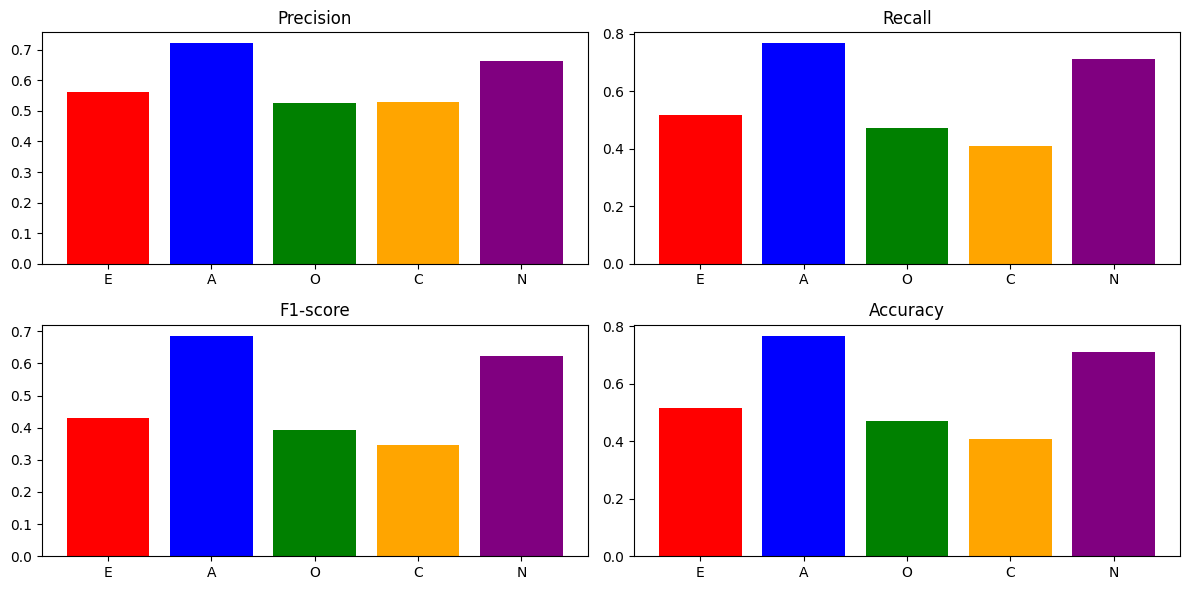

In [3]:
from matplotlib import pyplot as plt

colors = ['red', 'blue', 'green', 'orange', 'purple']
# 可视化
labels = ['E', 'A', 'O', 'C', 'N']
x = range(len(labels))

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(x, precision_scores, color=colors)
plt.xticks(x, labels)
plt.title('Precision')

plt.subplot(2, 2, 2)
plt.bar(x, recall_scores, color=colors)
plt.xticks(x, labels)
plt.title('Recall')

plt.subplot(2, 2, 3)
plt.bar(x, f1_scores, color=colors)
plt.xticks(x, labels)
plt.title('F1-score')

plt.subplot(2, 2, 4)
plt.bar(x, accuracy_scores, color=colors)
plt.xticks(x, labels)
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [4]:
overall_precision = sum(precision_scores) / len(precision_scores)
overall_recall = sum(recall_scores) / len(recall_scores)
overall_f1 = sum(f1_scores) / len(f1_scores)
overall_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print(f"整体精确率: {overall_precision:.4f}, 整体召回率: {overall_recall:.4f}, 整体F1值: {overall_f1:.4f}, 整体准确率: {overall_accuracy:.4f}")

整体精确率: 0.6004, 整体召回率: 0.5745, 整体F1值: 0.4951, 整体准确率: 0.5745
